In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hdf = pd.read_csv("day6.csv")
hdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
hdf.shape

(303, 14)

In [3]:
hdf["target"].unique()

array([1, 0], dtype=int64)

In [4]:
hdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: ylabel='age'>

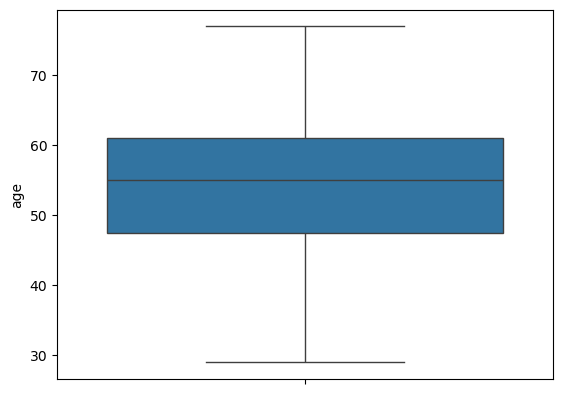

In [5]:
sns.boxplot(hdf["age"])

In [6]:
hdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: ylabel='chol'>

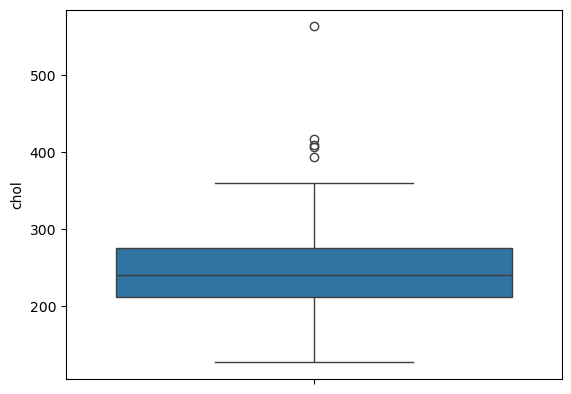

In [7]:
sns.boxplot(hdf["chol"])

In [8]:
hdf["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
hdf["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
hdf.groupby('sex').agg(
    {
        "target":"sum"
    }
)

,target
sex,
0,72
1,93


<Axes: xlabel='sex', ylabel='target'>

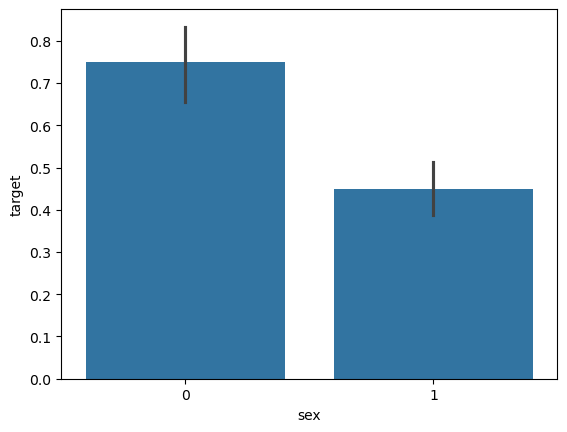

In [11]:
sns.barplot(x=hdf["sex"],y=hdf["target"])

In [16]:
crdf = hdf.corr()
crdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

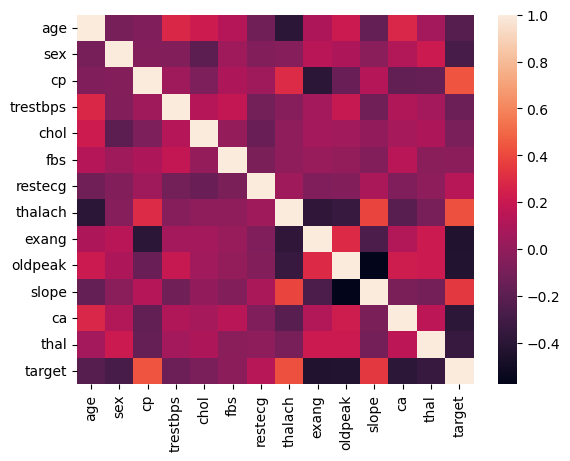

In [18]:
sns.heatmap(crdf)

In [20]:
hdf["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

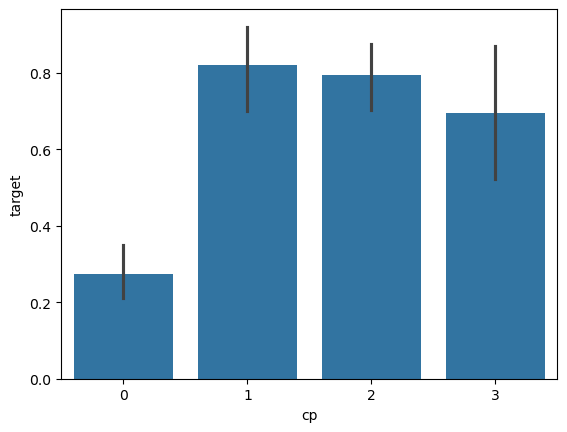

In [21]:
sns.barplot(x=hdf["cp"],y=hdf["target"])

In [22]:
hdf["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [25]:
hdf.groupby('cp').agg(
    {
        "target":"sum"
    }
)

,target
cp,
0,39
1,41
2,69
3,16


In [28]:
39+41+69+16


165

<Axes: ylabel='chol'>

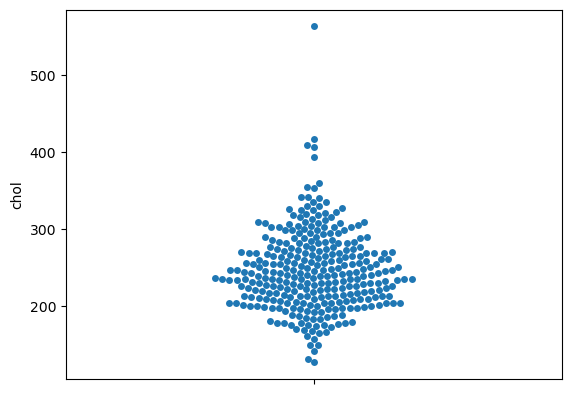

In [29]:
sns.swarmplot(hdf["chol"])

In [30]:
hdf["fbs"].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

<Axes: xlabel='fbs', ylabel='target'>

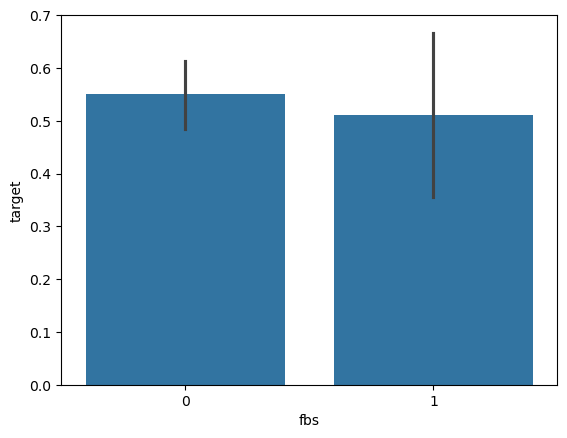

In [31]:
sns.barplot(x=hdf["fbs"],y=hdf["target"])

In [32]:
hdf["restecg"].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='target'>

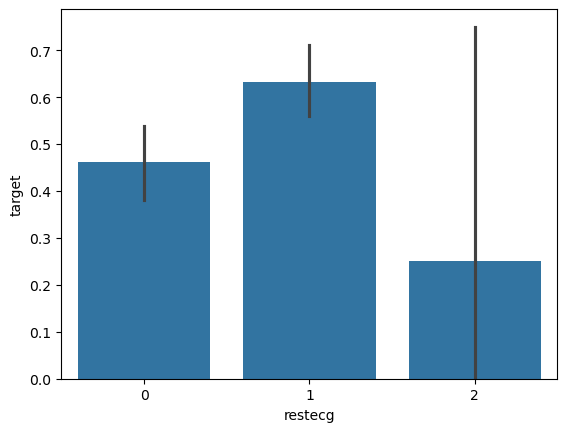

In [33]:
sns.barplot(x=hdf["restecg"],y=hdf["target"])

In [35]:
hdf.groupby('restecg').agg(
    {
        "target":"sum"
    }
)

,target
restecg,
0,68
1,96
2,1


In [36]:
(hdf["thalach"] > 160).value_counts()#maximum heart rate achieved.

thalach
False    193
True     110
Name: count, dtype: int64

<Axes: ylabel='oldpeak'>

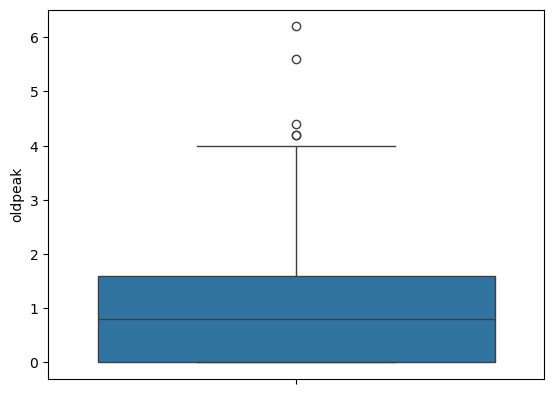

In [38]:
sns.boxplot(hdf["oldpeak"])

In [39]:
hdf["slope"].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slope', ylabel='target'>

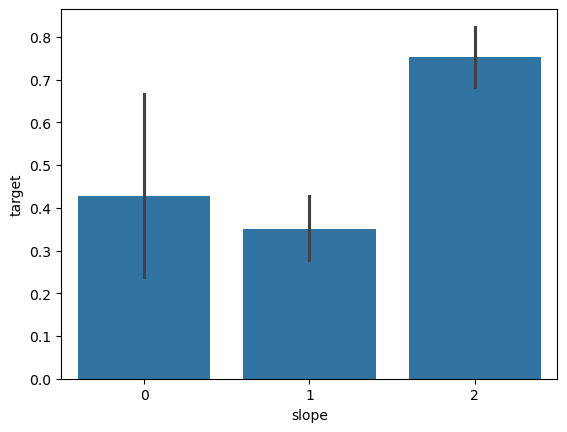

In [40]:
sns.barplot(x=hdf["slope"],y=hdf["target"])

In [41]:
hdf["thal"].value_counts()#

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='target'>

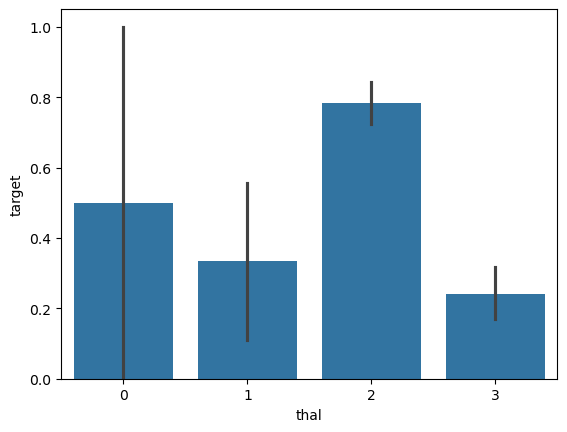

In [42]:
sns.barplot(x=hdf["thal"],y=hdf["target"])

In [43]:
from sklearn.model_selection import train_test_split
X = hdf.iloc[:,0:12]
Y = hdf.iloc[:,13]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [44]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [46]:
predictions = knn.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
print(f"Accuracy is {accuracy_score(predictions,Y_test)*100}")

Accuracy is 75.40983606557377


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=300)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=300)

In [81]:
predictions = rf.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
print(f"Accuracy for RF :{accuracy_score(predictions,Y_test)*100}")

Accuracy for RF :86.88524590163934
